In [2]:
%matplotlib inline

Creating the dataset...
- done.
Starting evaluation
- Eval metrics : accuracy: 0.625 ; loss: 1.092


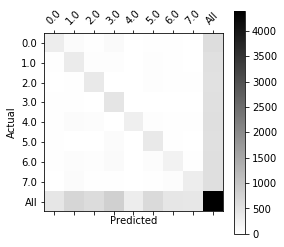

In [5]:
%run evaluate.py